In [1]:
import pandas as pd
import glob
import os

In [28]:
! pwd

/users/home/kda115/Spark/Assignment/Visualize_Notebook


### Loading and Processing The Data 

In [2]:
# Define the directory where your files are located
directory = "/users/home/kda115/Spark/Assignment/NZ_Temperature"

In [3]:
# Use glob to find all csv files in the directory
NZ_rainfall_files = glob.glob(os.path.join(directory, "*.csv"))

In [4]:
# Initialize an empty list to hold DataFrames
rainfall_list = []

# Loop through each file and read it into a DataFrame
for filename in NZ_rainfall_files:
    df = pd.read_csv(filename)
    rainfall_list.append(df)

In [5]:
# Concatenate all DataFrames into a single DataFrame
NZ_rainfall = pd.concat(rainfall_list, ignore_index=True)

# print out the reuslt 
NZ_rainfall.head(5)

,Station_ID,DATE,Element,VALUE,Measurement_Flag,Quality_Flag,Source_Flag,Observation_Time,Year
0,NZ000093012,19970101,TMAX,259,NaN,NaN,G,NaN,1997
1,NZ000093012,19970101,TMIN,183,NaN,NaN,G,NaN,1997
2,NZ000093292,19970101,TMAX,224,NaN,NaN,G,NaN,1997
3,NZ000093292,19970101,TMIN,163,NaN,NaN,G,NaN,1997
4,NZ000093417,19970101,TMAX,226,NaN,NaN,G,NaN,1997


In [6]:
NZ_rainfall['VALUE'].count()

487760

### Checking number of stations did not full collected 12 months

In [7]:
# Extract the month from the DATE column
NZ_rainfall['Month'] = NZ_rainfall['DATE'].astype(str).str[4:6].astype(int)

# Group by Station_ID and Year, and count the number of unique months for each combination
month_count_per_station_year = NZ_rainfall.groupby(['Station_ID', 'Year'])['Month'].nunique().reset_index(name='Unique_Months')

# Filter the stations that collected records for fewer than 12 months in a year
incomplete_years = month_count_per_station_year[month_count_per_station_year['Unique_Months'] < 12]

# Sort by Year in ascending order
incomplete_years = incomplete_years.sort_values(by='Year', ascending=True)

# Count the number of incomplete years
incomplete_years

,Station_ID,Year,Unique_Months
228,NZ000093994,1940,10
506,NZ000939450,1941,6
151,NZ000093844,1948,8
449,NZ000937470,1949,2
580,NZ000939870,1956,3
35,NZ000093292,1962,11
468,NZ000937470,1968,1
594,NZ000939870,1970,9
595,NZ000939870,1971,1
536,NZ000939450,1971,1


### Remove stations that have not fully collected 12 months 

In [8]:
# Exclude the stations and years with fewer than 12 months from the main DataFrame
NZ_rainfall = NZ_rainfall.merge(incomplete_years[['Station_ID', 'Year']], on=['Station_ID', 'Year'], how='left', indicator=True)

# Keep only the rows where the merge result is not from incomplete_years
NZ_rainfall = NZ_rainfall[NZ_rainfall['_merge'] == 'left_only']

# Drop the helper merge column '_merge'
NZ_rainfall.drop('_merge', axis=1, inplace=True)

# Show the result
NZ_rainfall.head(5)

,Station_ID,DATE,Element,VALUE,Measurement_Flag,Quality_Flag,Source_Flag,Observation_Time,Year,Month
0,NZ000093012,19970101,TMAX,259,NaN,NaN,G,NaN,1997,1
1,NZ000093012,19970101,TMIN,183,NaN,NaN,G,NaN,1997,1
2,NZ000093292,19970101,TMAX,224,NaN,NaN,G,NaN,1997,1
3,NZ000093292,19970101,TMIN,163,NaN,NaN,G,NaN,1997,1
4,NZ000093417,19970101,TMAX,226,NaN,NaN,G,NaN,1997,1


In [9]:
NZ_rainfall['VALUE'].count()

477872

### Calculate the Yearly Average TMIN and TMAX 

In [10]:
# Select relevant column 
NZ_rainfall = NZ_rainfall[['Station_ID', 'Element', 'VALUE', 'Year']]

# Print out the result
NZ_rainfall.head(5)

,Station_ID,Element,VALUE,Year
0,NZ000093012,TMAX,259,1997
1,NZ000093012,TMIN,183,1997
2,NZ000093292,TMAX,224,1997
3,NZ000093292,TMIN,163,1997
4,NZ000093417,TMAX,226,1997


In [11]:
# Iterate through the columns and count the null values
for name in NZ_rainfall.columns:
    count = NZ_rainfall[name].isna().sum()
    print(f"{name}: {count}")

Station_ID: 0
Element: 0
VALUE: 0
Year: 0


In [12]:
# Filter for TMAX elements
NZ_rainfall_tmax = NZ_rainfall[NZ_rainfall['Element'] == 'TMAX']

# Print out the filtered result
NZ_rainfall_tmax.head(5)

,Station_ID,Element,VALUE,Year
0,NZ000093012,TMAX,259,1997
2,NZ000093292,TMAX,224,1997
4,NZ000093417,TMAX,226,1997
6,NZ000093844,TMAX,178,1997
8,NZ000093994,TMAX,241,1997


In [13]:
# Group by Station_ID and Year, and calculate the mean TMAX VALUE
tmax_mean = NZ_rainfall_tmax.groupby(['Station_ID', 'Year'])['VALUE'].mean().reset_index()

# Rename the VALUE column to Mean_TMAX for clarity
tmax_mean = tmax_mean.rename(columns={'VALUE': 'Mean_TMAX'})

# Print out the resulting DataFrame
tmax_mean.head(5)

,Station_ID,Year,Mean_TMAX
0,NZ000093012,1966,181.273016
1,NZ000093012,1967,184.310458
2,NZ000093012,1968,178.863333
3,NZ000093012,1969,178.551020
4,NZ000093012,1980,181.987768


In [14]:
# Filter for TMAX elements
NZ_rainfall_tmin = NZ_rainfall[NZ_rainfall['Element'] == 'TMIN']

# Group by Station_ID and Year, and calculate the mean TMIN VALUE
tmin_mean = NZ_rainfall_tmin.groupby(['Station_ID', 'Year'])['VALUE'].mean().reset_index()

# Rename the VALUE column to Mean_TMAX for clarity
tmin_mean = tmin_mean.rename(columns={'VALUE': 'Mean_TMIN'})

# Print out the resulting DataFrame
tmin_mean.head(5)

,Station_ID,Year,Mean_TMIN
0,NZ000093012,1966,117.859425
1,NZ000093012,1967,117.987138
2,NZ000093012,1968,118.149847
3,NZ000093012,1969,117.449367
4,NZ000093012,1980,97.402597


In [15]:
# Combine the tmax_mean and tmin_mean DataFrames
NZ_TMAX_TMIN_Average = pd.merge(tmax_mean, tmin_mean, on=['Station_ID', 'Year'], how='inner')

# Print out the resulting DataFrame
NZ_TMAX_TMIN_Average.head(5)

,Station_ID,Year,Mean_TMAX,Mean_TMIN
0,NZ000093012,1966,181.273016,117.859425
1,NZ000093012,1967,184.310458,117.987138
2,NZ000093012,1968,178.863333,118.149847
3,NZ000093012,1969,178.551020,117.449367
4,NZ000093012,1980,181.987768,97.402597


### Convert TMIN & TMAX from tenths of a degree Celsius to standard degrees Celsius

In [16]:
# Convert tenths of degree Celsius to degrees Celsius
NZ_TMAX_TMIN_Average['Mean_TMAX_Celsius'] = NZ_TMAX_TMIN_Average['Mean_TMAX'] / 10
NZ_TMAX_TMIN_Average['Mean_TMIN_Celsius'] = NZ_TMAX_TMIN_Average['Mean_TMIN'] / 10

# Print out the updated DataFrame
NZ_TMAX_TMIN_Average.head()

,Station_ID,Year,Mean_TMAX,Mean_TMIN,Mean_TMAX_Celsius,Mean_TMIN_Celsius
0,NZ000093012,1966,181.273016,117.859425,18.127302,11.785942
1,NZ000093012,1967,184.310458,117.987138,18.431046,11.798714
2,NZ000093012,1968,178.863333,118.149847,17.886333,11.814985
3,NZ000093012,1969,178.551020,117.449367,17.855102,11.744937
4,NZ000093012,1980,181.987768,97.402597,18.198777,9.740260


### Plot Time Series for TMIN and TMAX for Each Station

In [17]:
import matplotlib.pyplot as plt

In [18]:
# Ensure that the station IDs are unique in the DataFrame
stations = NZ_TMAX_TMIN_Average['Station_ID'].unique()

### Plot at the same scale of year

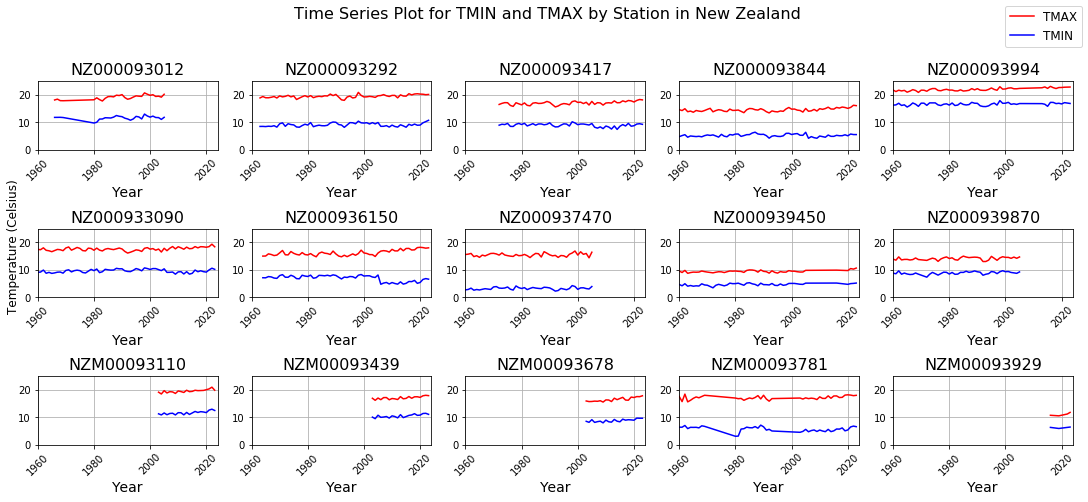

In [73]:
import matplotlib.pyplot as plt

# Set the overall size of the plot grid
plt.figure(figsize=(15, len(stations) // 5 * 3))

# Define consistent x-axis limits (for example, 1980 to 2020)
x_min, x_max = 1960, 2024

# Define consistent y-axis limits based on your data range
y_min, y_max = 0, 25  # Adjust these values as necessary

# Loop through each station and plot TMIN and TMAX
for i, station in enumerate(stations):
    # Filter data for the current station
    station_data = NZ_TMAX_TMIN_Average[NZ_TMAX_TMIN_Average['Station_ID'] == station]
    
    # Create a subplot for each station with 5 subplots per row
    ax = plt.subplot(len(stations) // 5 + 1, 5, i + 1)
    
    # Plot TMAX and TMIN
    ax.plot(station_data['Year'], station_data['Mean_TMAX_Celsius'], color='red', label='TMAX')
    ax.plot(station_data['Year'], station_data['Mean_TMIN_Celsius'], color='blue', label='TMIN')
    
    # Set the title and labels for each subplot
    ax.set_title(station)
    ax.set_xlabel('Year')
    
    # Set consistent y-axis limits
    ax.set_ylim(y_min, y_max)
    
    # Set consistent x-axis limits for all plots
    ax.set_xlim(x_min, x_max)
    
    # Adjust x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add the grid
    plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Add a big title at the top
plt.suptitle('Time Series Plot for TMIN and TMAX by Station in New Zealand', fontsize=16, y=1.02)

# Add a big y-axis label for the entire figure
plt.figtext(0.000001, 0.65, 'Temperature (Celsius)', va='center', rotation='vertical', fontsize=12)

# Create a single legend for all subplots
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper right', fontsize = 12)

# Save the image 
# plt.savefig('NZ_Temperature_Stations.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [20]:
import matplotlib.pyplot as plt

# Set the overall size of the plot grid
plt.figure(figsize=(15, len(stations) // 5 * 3))

# Define consistent x-axis limits (for example, 1980 to 2020)
x_min, x_max = 1960, 2024

# Define consistent y-axis limits based on your data range
y_min, y_max = 0, 25  # Adjust these values as necessary

# Loop through each station and plot TMIN and TMAX
for i, station in enumerate(stations):
    # Filter data for the current station
    station_data = NZ_TMAX_TMIN_Average[NZ_TMAX_TMIN_Average['Station_ID'] == station]

    # Create a subplot for each station
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot TMAX and TMIN
    ax.plot(station_data['Year'], station_data['Mean_TMAX_Celsius'], color='red', label='TMAX')
    ax.plot(station_data['Year'], station_data['Mean_TMIN_Celsius'], color='blue', label='TMIN')

    # Set the title and labels for each subplot
    ax.set_title(f'Station ID: {station}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature (Celsius)')
    
    # Set y and x limits
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    
    # Adjust x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add the grid
    ax.grid(True)

    # Add legend
    ax.legend()

    # Save each plot as a separate image file with a unique name
    plt.savefig(f'NZ_Temperature_Station_{station}.png', dpi=300, bbox_inches='tight')

    # Close the figure to free memory
    plt.close(fig)

# Done saving all station plots

<Figure size 1080x648 with 0 Axes>

### Plot Time Series for TMIN and TMAX of Stations have no data before 2000 

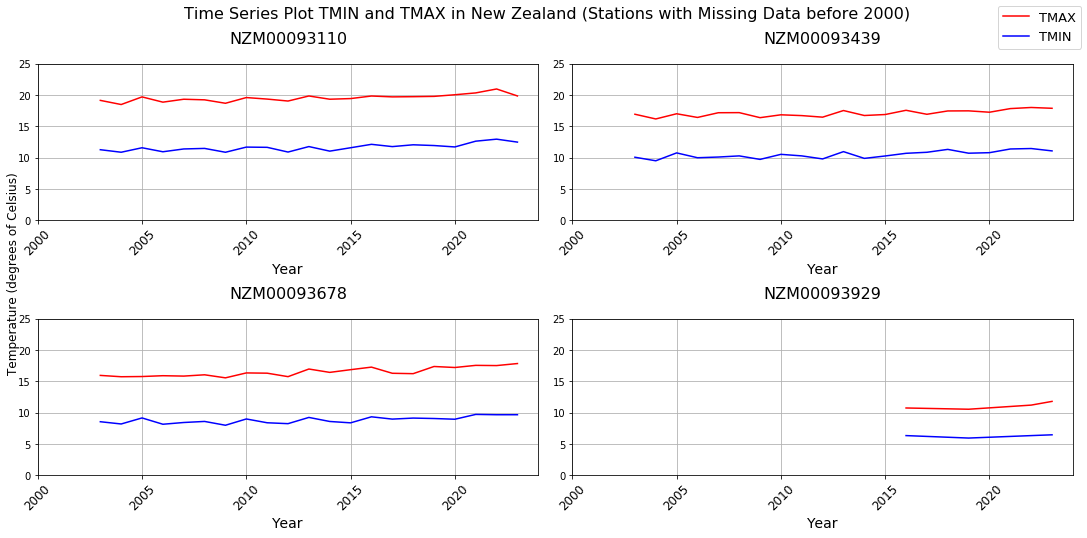

In [41]:
import matplotlib.pyplot as plt

# Define the specific station IDs to plot
specific_stations = ['NZM00093110', 'NZM00093439', 'NZM00093678', 'NZM00093929']

# Define consistent y-axis limits based on your data range
y_min, y_max = 0, 25  # Adjust these values as necessary

# Define consistent x-axis limits 
x_min, x_max = 2000, 2024

# Set the overall size of the plot grid
plt.figure(figsize=(15, 10))  # Make sure height is non-zero

# Loop through each specified station and plot TMIN and TMAX
for i, station in enumerate(specific_stations):
    # Filter data for the current station
    station_data = NZ_TMAX_TMIN_Average[NZ_TMAX_TMIN_Average['Station_ID'] == station]

    # Create a subplot for each station with 2 subplots per row
    ax = plt.subplot(len(specific_stations) // 2 + 1, 2, i + 1)
    
    # Plot TMAX and TMIN
    ax.plot(station_data['Year'], station_data['Mean_TMAX_Celsius'], color='red', label='TMAX')
    ax.plot(station_data['Year'], station_data['Mean_TMIN_Celsius'], color='blue', label='TMIN')
    
    # Set the title and labels for each subplot
    ax.set_title(station, pad=20, fontsize = 16)  # Increase padding between title and plot
    ax.set_xlabel('Year', fontsize = 14)
    ax.tick_params(axis='x', labelsize=12)
    
    # Set consistent y-axis limits
    ax.set_ylim(y_min, y_max)
    
    # Set consistent x-axis limits for all plots
    ax.set_xlim(x_min, x_max)
    
    # Adjust x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add the grid
    plt.grid(True)

# Increase the space between plots to avoid overlap
plt.subplots_adjust(hspace=0.8, wspace=0.2)  # Adjust spacing as necessary

# Add a big title at the top
plt.suptitle('Time Series Plot TMIN and TMAX in New Zealand (Stations with Missing Data before 2000)', fontsize=16, y=1.02)

# Add a big y-axis label for the entire figure
plt.figtext(0.0000000000000001, 0.65, 'Temperature (degrees of Celsius)', va='center', rotation='vertical', fontsize=12)

# Create a single legend for all subplots with a larger font size
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper right', fontsize=13)  # Increase fontsize

plt.tight_layout()

# Save the plot as a PNG file
#plt.savefig('NZ_Temperature_Stations_Missing_Data_2000.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Plot the average time series for TMIN and TMAX for the entire country 

In [42]:
# Group by Year and calculate the mean TMIN and TMAX for the entire country
NZ_Avg_Temp = (NZ_TMAX_TMIN_Average.groupby('Year')
                .agg({'Mean_TMAX_Celsius': 'mean', 'Mean_TMIN_Celsius': 'mean'}).reset_index())

# Show the result 
NZ_Avg_Temp.head(5)

,Year,Mean_TMAX_Celsius,Mean_TMIN_Celsius
0,1941,21.415068,15.915385
1,1942,16.583169,10.485616
2,1943,15.439192,10.458767
3,1944,15.724980,9.830510
4,1945,15.722831,9.713242


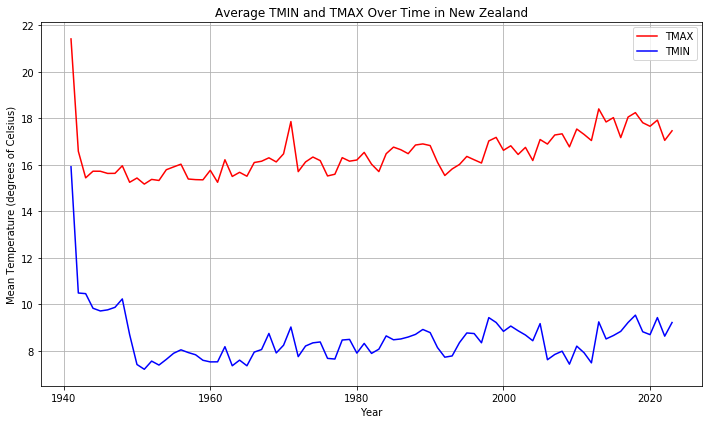

In [44]:
# Plotting the average TMIN and TMAX over the years
plt.figure(figsize=(10, 6))

# Plot TMAX
plt.plot(NZ_Avg_Temp['Year'], NZ_Avg_Temp['Mean_TMAX_Celsius'], color='red', label='TMAX')

# Plot TMIN
plt.plot(NZ_Avg_Temp['Year'], NZ_Avg_Temp['Mean_TMIN_Celsius'], color='blue', label='TMIN')

# Add title and labels
plt.title('Average TMIN and TMAX Over Time in New Zealand')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (degrees of Celsius)')

# Add a legend
plt.legend()

# Add the grid
plt.grid(True)

# Save the plot as a PNG file
# plt.savefig('Average TMIN and TMAX_Over_NZ.png', dpi=300, bbox_inches='tight')
plt.tight_layout()

# Display the plot
plt.show()